# Drawing a rotated rectangle on a map

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/plot_rotated_rectangle.html

This example will demonstrate how to draw a rectangle that is rotated relative
to the axes on a map using `sunpy.map.GenericMap.draw_quadrangle`.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord, SkyOffsetFrame

import sunpy.data.sample
import sunpy.map

Let's start with a sample image of AIA 171.

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

Define the rotation angle and center coordinate of the rectangle,
as well as the width and height in physical units.

In [ ]:
rotation_angle = 30 * u.deg
center_coord = SkyCoord(-100 * u.arcsec, -300 * u.arcsec, frame=aia_map.coordinate_frame)
width = 1000 * u.arcsec
height = 300 * u.arcsec

We define a custom coordinate frame for the rotated rectangle by providing
the center in the AIA 171 coordinate frame and rotation angle to
`astropy.coordinates.SkyOffsetFrame`.  We then define a 2-element
`astropy.coordinates.SkyCoord` in that custom coordinate frame for the
bottom-left and top-right corners of the rectangle.

In [ ]:
offset_frame = SkyOffsetFrame(origin=center_coord, rotation=rotation_angle)
rectangle = SkyCoord(lon=[-1/2, 1/2] * width, lat=[-1/2, 1/2] * height, frame=offset_frame)

Finally, we will draw the rotated rectangle and its center.

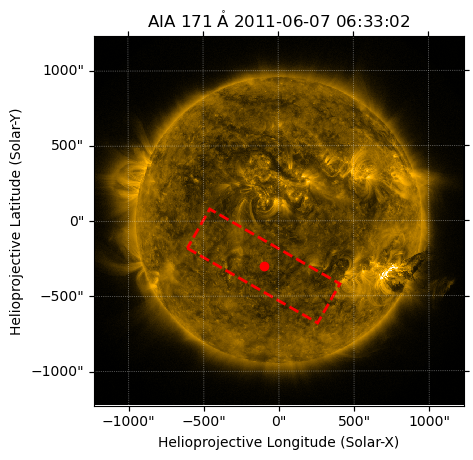

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax, clip_interval=(1, 99.99) * u.percent)
ax.plot_coord(center_coord, "o", color="red")

aia_map.draw_quadrangle(
    rectangle,
    axes=ax,
    edgecolor="red",
    linestyle="--",
    linewidth=2,
)

plt.show()